In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

import logging, sys
logging.disable(sys.maxsize)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

D:\d_program_files\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\d_program_files\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\d_program_files\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\d_program_files\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: Futu

In [2]:
config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [3]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model, Sequential

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

In [5]:
IMAGE_SIZE = [224, 224]
train_path = 'data/train'
test_path = 'data/test'

In [6]:
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False, pooling='avg')

In [7]:
for layer in resnet.layers:
    layer.trainable = False

In [8]:
folders = glob('data/train/*')

In [9]:
x = Flatten()(resnet.output)

In [10]:
prediction = Dense(len(folders), activation='softmax')(x)

model = Model(inputs=resnet.input, outputs=prediction)

In [11]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
______________________________________________________________________________________________

In [12]:
# Cost & Optimization
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [13]:
# Impor images 
train_datagen = ImageDataGenerator(rescale=1./255,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [14]:
training_set = train_datagen.flow_from_directory(train_path, 
                                                target_size=(224, 224),
                                                batch_size=32,
                                                class_mode='categorical')

test_set = train_datagen.flow_from_directory(test_path, 
                                                target_size=(224, 224),
                                                batch_size=32,
                                                class_mode='categorical')

Found 1951 images belonging to 4 classes.
Found 18 images belonging to 4 classes.


In [15]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/20
61/61 [==============================] - 262s 4s/step - loss: 0.5785 - acc: 0.7883 - val_loss: 1.4261 - val_acc: 0.2778
Epoch 2/20
61/61 [==============================] - 267s 4s/step - loss: 0.2569 - acc: 0.9129 - val_loss: 1.5492 - val_acc: 0.1111
Epoch 3/20
61/61 [==============================] - 271s 4s/step - loss: 0.1911 - acc: 0.9400 - val_loss: 1.6032 - val_acc: 0.1667
Epoch 4/20
61/61 [==============================] - 264s 4s/step - loss: 0.1486 - acc: 0.9575 - val_loss: 1.7003 - val_acc: 0.1667
Epoch 5/20
61/61 [==============================] - 264s 4s/step - loss: 0.1484 - acc: 0.9503 - val_loss: 1.7092 - val_acc: 0.1667
Epoch 6/20
61/61 [==============================] - 263s 4s/step - loss: 0.1268 - acc: 0.9610 - val_loss: 1.9401 - val_acc: 0.1667
Epoch 7/20
61/61 [==============================] - 263s 4s/step - loss: 0.1262 - acc: 0.9626 - val_loss: 1.8045 - val_acc: 0.1667
Epoch 8/20
61/61 [==============================] - 263s 4s/step - loss: 0.1236 - a

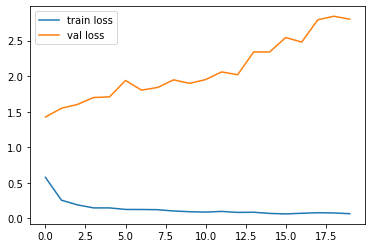

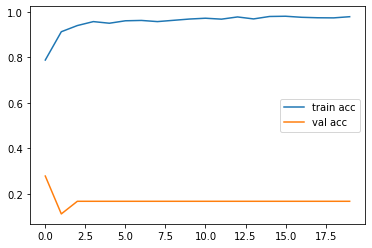

In [16]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.savefig('LossVal_loss')
plt.show()


plt.plot(r.history['acc'], label='train acc')
plt.plot(r.history['val_acc'], label='val acc')
plt.legend()
plt.savefig('Accval_acc')

In [17]:
model.save('model_resnet50.h5')

In [18]:
y_pred = model.predict(test_set)
y_pred

array([[0.79071975, 0.14994748, 0.00644159, 0.05289115],
       [0.80302083, 0.13893612, 0.00653898, 0.05150411],
       [0.798875  , 0.1452571 , 0.00633573, 0.04953225],
       [0.80567265, 0.13665685, 0.00585942, 0.05181104],
       [0.81667197, 0.12901591, 0.00537109, 0.04894105],
       [0.796196  , 0.14599058, 0.00609328, 0.05172012],
       [0.8110588 , 0.13451026, 0.00532013, 0.0491108 ],
       [0.79860115, 0.14499678, 0.00626121, 0.05014083],
       [0.79393476, 0.14965996, 0.00620483, 0.05020053],
       [0.80595464, 0.13747364, 0.00595092, 0.05062085],
       [0.79127795, 0.14967355, 0.00673149, 0.05231704],
       [0.80035317, 0.1422881 , 0.00653834, 0.05082044],
       [0.7944353 , 0.14917411, 0.00602209, 0.05036848],
       [0.80722904, 0.13317245, 0.00618461, 0.05341393],
       [0.79247016, 0.15014419, 0.00612875, 0.05125697],
       [0.78275084, 0.1567766 , 0.00691781, 0.05355473],
       [0.7953637 , 0.146392  , 0.0067003 , 0.05154401],
       [0.82719177, 0.11257157,

In [19]:
y_pred1 = np.argmax(y_pred, axis=1)
np.unique(y_pred1)

array([0], dtype=int64)

In [20]:
np.unique(y_pred)

array([0.00532013, 0.00537109, 0.00585942, 0.00595092, 0.00602209,
       0.00602215, 0.00609328, 0.00612875, 0.00618461, 0.00620483,
       0.00626121, 0.00633573, 0.00644159, 0.00653834, 0.00653898,
       0.0067003 , 0.00673149, 0.00691781, 0.04894105, 0.0491108 ,
       0.04953225, 0.05014083, 0.05020053, 0.05036848, 0.05062085,
       0.05082044, 0.05125697, 0.05150411, 0.05154401, 0.05172012,
       0.05181104, 0.05231704, 0.05289115, 0.05341393, 0.05355473,
       0.05421456, 0.11257157, 0.12901591, 0.13317245, 0.13451026,
       0.13665685, 0.13747364, 0.13893612, 0.1422881 , 0.14499678,
       0.1452571 , 0.14599058, 0.146392  , 0.14917411, 0.14965996,
       0.14967355, 0.14994748, 0.15014419, 0.1567766 , 0.78275084,
       0.79071975, 0.79127795, 0.79247016, 0.79393476, 0.7944353 ,
       0.7953637 , 0.796196  , 0.79860115, 0.798875  , 0.80035317,
       0.80302083, 0.80567265, 0.80595464, 0.80722904, 0.8110588 ,
       0.81667197, 0.82719177], dtype=float32)

In [21]:
# img = image.load_img('data/val/diseased cotton leaf/dis_leaf (93)_iaip.jpg', target_size=(224, 224))
img = image.load_img('data/val/fresh cotton leaf/d (7)_iaip.jpg', target_size=(224, 224))
x = image.img_to_array(img)
x=x/255
x=np.expand_dims(x,axis=0)
# img_data=preprocess_input(x)
# img_data.shape
preds = model.predict(x)
a=np.argmax(preds, axis=1)
a

array([0], dtype=int64)

In [22]:
img = image.load_img('data/val/diseased cotton leaf/dis_leaf (285)_iaip.jpg', target_size=(224, 224))
# img = image.load_img('data/val/fresh cotton leaf/d (8)_iaip.jpg', target_size=(224, 224))
# img = image.load_img('data/test/diseased cotton leaf/dis_leaf (124).jpg', target_size=(224, 224))
x = image.img_to_array(img)
x=x/255
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape
d = model.predict(img_data)
a=np.argmax(d, axis=1)
a

array([0], dtype=int64)

In [23]:
### All coming as 0, wtf :(